<a href="https://colab.research.google.com/github/Victor09Lara/EDD_1358/blob/main/Laberinto_EDD_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Clase ADT2D

In [ ]:
package laberintoedd;

import java.util.ArrayList;

public class ADT2D<E> {

    private ArrayList ren = new ArrayList(), aux;
    private int numRenglones, numColumnas;
    
    public ADT2D(int a, int b){    
        
        this.numRenglones = a;
        this.numColumnas = b;
        
        for(int i=0; i<numRenglones ; i++){
            ArrayList tmp = new ArrayList();
            for(int j=0 ; j<numColumnas ; j++){
                tmp.add(null);
            }
            ren.add(tmp);   
        }
    }
    
    public void clear(E dato){
        for(int i=0; i<numRenglones ; i++){
            for(int j=0 ; j<numColumnas ; j++){
                aux.set(j,dato);
            }
            ren.set(i, (E) aux);
        }
    }
    
    public void setElement(int a,int b,E dato){
            aux =(ArrayList) ren.get(a);
            aux.set(b, dato);          
            ren.set(a, (E) aux);    
    }
    
    public E getElement(int a, int b){
        aux = (ArrayList)ren.get(a);
        return (E) aux.get(b);            
    } 
    
    public int getLenghtRow(){
        return this.numRenglones;
    }
    
    public int getLenghtCol(){
        return this.numColumnas;
    }
    
    public String toString(){
        return String.format("%s", ren);
    } 
}

#Clase Pila

In [ ]:

package laberintoedd;

import java.util.ArrayList;

public class Pila<T> {

    private int lenght;
    private ArrayList<T> pila;

    public Pila() {
        pila = null;
        lenght = 0;
    }

    public T pop() {

        T dato = null;

        if (!pila.isEmpty())
        {
            dato = pila.get(lenght - 1);
            pila.remove(lenght - 1);
        }

        lenght = pila.size();

        return dato;

    }

    public T peek() {

        T dato = null;

        if (!pila.isEmpty())
        {
            dato = pila.get(lenght - 1);
        }

        return dato;
    }

    public void push(T dato) {

        if (pila == null)
        {
            pila = new ArrayList();
        }

        pila.add(dato);

        lenght = pila.size();

    }

    public boolean isEmpty() {
        return pila == null;
    }

    public int getLenght() {
        return lenght;
    }

    @Override
    public String toString() {
        String estado = "";

        for(T dato: pila){
            estado = estado +"\n"+ dato;
        }

        return estado;
    }

}

#Clase LogicaLaberinto

In [ ]:
package laberintoedd;

import java.io.BufferedReader;
import java.io.FileNotFoundException;
import java.io.FileReader;
import java.io.IOException;


public class LogicaLaberinto {

    ADT2D laberinto;
    int entradaCol, entradaRen, salidaCol, salidaRen;
    Pila pila = new Pila();
    public static final String ANSI_BLACK = "\u001B[30m";
public static final String ANSI_RED = "\u001B[31m";
    
    public LogicaLaberinto(){
        try{
            FileReader fr = new FileReader("Laberinto.csv");
            BufferedReader br = new BufferedReader(fr);
            
            String linea = br.readLine();
            String[] columnas = linea.split(",");
            
            
            int numRenglones = Integer.parseInt(columnas[0]);
            int numColumnas = Integer.parseInt(columnas[1]);
            laberinto = new ADT2D(numRenglones,numColumnas);
            entradaRen = Integer.parseInt(columnas[2]);
            entradaCol = Integer.parseInt(columnas[3]);
            salidaRen = Integer.parseInt(columnas[4]);
            salidaCol = Integer.parseInt(columnas[5]);
            
            
            for (int r = 0; r < numRenglones; r++)
            {
                linea = br.readLine();
                columnas = linea.split(",");

                for (int c = 0; c < numColumnas; c++)
                {
                    String actual = columnas[c];
                    if (actual.equals("0"))
                    {
                        laberinto.setElement(r, c, true);
                    } else if (actual.equals("1"))
                    {
                        laberinto.setElement(r, c, false);
                    }
                }
            }
            
            System.out.println("El laberinto es el siguiente: ");
            for (int r = 0; r < numRenglones; r++)
            {

                for (int c = 0; c < numColumnas; c++)
                {

                    boolean actual = (boolean) laberinto.getElement(r, c);
                    if(actual){
                        System.out.print(ANSI_RED + "■");
                    }else{
                        System.out.print(ANSI_BLACK + "■");
                    }
                }
                System.out.println("");
            }
            
        } catch (FileNotFoundException ex)
        {
            ex.printStackTrace();
        } catch (IOException ex)
        {
            ex.printStackTrace();
        }
    }
    
    public void salirDelLaberinto(){
        int colActual = entradaCol, renActual = entradaRen;
        int[] agregarAPila = {renActual,colActual};
        boolean centinela = true;
        pila.push(agregarAPila);
        
        while(centinela){
            
            siguiente();
            int[] actual = (int[]) pila.peek();
            renActual = actual[0];
            colActual = actual[1];
            
            if(renActual==salidaRen&&colActual==salidaCol){
                centinela=false;
            }else if(renActual==laberinto.getLenghtRow()&&colActual==laberinto.getLenghtCol()){
                pila.pop();
                int[] incorrecta = (int[]) pila.pop();
                int r = incorrecta[0], c = incorrecta[1];
                laberinto.setElement(r, c, false);
                if(renActual==entradaRen&&colActual==entradaCol){
                    System.out.println("No se encontro salida");
                    pila = null;
                    centinela = false;
                }
            }
        }
        
        System.out.println("La solucion a el laberinto es (renglones,columnas): ");

        Pila voltearPila = new Pila();
        while(pila.getLenght()!=0){
            
            voltearPila.push(pila.pop());
        }
        pila = voltearPila; 
        while(pila.getLenght()!=0){
            int[] actual = (int[]) pila.pop();
            System.out.println(actual[0]+","+actual[1]);
        }
        
    }
    
    public void siguiente(){
        int colActual,renActual,renAnterior,colAnterior;
        int[] sacarActual,sacarAnterior,meter = new int[2];
        
        if(pila.getLenght()!=1){
            sacarActual = (int[]) pila.pop();
            sacarAnterior = (int[]) pila.peek();
            
            colActual = sacarActual[1];
            renActual = sacarActual[0];
            colAnterior = sacarAnterior[1];
            renAnterior = sacarAnterior[0];
            
            pila.push(sacarActual);
            
        }else{
            sacarActual = (int[]) pila.peek();
            colActual = sacarActual[1];
            renActual = sacarActual[0];
            colAnterior = sacarActual[1];
            renAnterior = sacarActual[0];
        }

        int paso;
        
        for(paso=1;paso<5;paso++){
            if(saltarOrilla(paso, renActual, colActual)){
                int[] nuevasCord = algoritmo(paso, renActual, colActual);
                int nuevoRenglon = nuevasCord[0],nuevaColumna=nuevasCord[1];
                boolean casilla = (boolean) laberinto.getElement(nuevoRenglon, nuevaColumna);
                if(casilla&&!(nuevoRenglon ==renAnterior && nuevaColumna == colAnterior)){
                    meter = nuevasCord;
                    break;
                }
            }
        }
        
        if(paso==5){
            meter[0] = laberinto.getLenghtRow();
            meter[1] = laberinto.getLenghtCol();
        }
        
        pila.push(meter);
        
        
    }
    
    public int[] algoritmo(int paso, int r, int c){
        
        int[] nuevasCord = new int[2];
        
        if(paso==1){
            nuevasCord[0] = r;
            nuevasCord[1] = c-1;
        }else if(paso==2){
            nuevasCord[0] = r-1;
            nuevasCord[1] = c;
        }else if(paso==3){
            nuevasCord[0] = r;
            nuevasCord[1] = c+1;
        }else if(paso==4){
            nuevasCord[0] = r+1;
            nuevasCord[1] = c;
        }
        
        return nuevasCord;
        
    }
    
    public boolean saltarOrilla(int paso, int r, int c){
        boolean desicion = true;
        
        if(c==0&&paso==1){
            desicion = false;
        }else if(r==0&&paso==2){
            desicion = false;
        }else if(c==laberinto.getLenghtCol()-1&&paso==3){
            desicion = false;
        }else if(r==laberinto.getLenghtRow()&&paso==4){
            desicion = false;
        }
        
        return desicion;
    }
}

#Clase LaberintoEDD

In [ ]:
package laberintoedd;


public class LaberintoEDD {

    
    public static void main(String[] args) {
        LogicaLaberinto solucion = new LogicaLaberinto();
        solucion.salirDelLaberinto();
    }
    
}

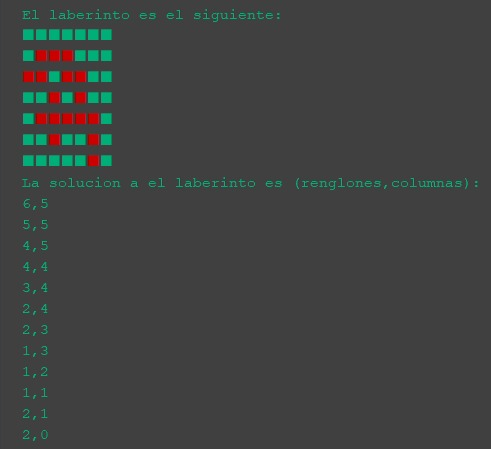